# Separate the XOR problem using a multilayer perceptron

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from lib.mlp import MLP

In [4]:
# Data
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T

# Labels
y = np.array([[0, 1, 1, 0]])

In [5]:
# Plot data in foreground, predictions in background
def plot_predictions(x, y, model, zoom_out_ratio=1.1):

    # Find data bounds
    x1_min, x2_min = x.min(axis=1)
    x1_max, x2_max = x.max(axis=1)

    x1_range = x1_max - x1_min
    x2_range = x2_max - x2_min

    # Enlarge data bounds for prettier plotting
    x1_min -= (zoom_out_ratio - 1) * x1_range
    x1_max += (zoom_out_ratio - 1) * x1_range
    x2_min -= (zoom_out_ratio - 1) * x2_range
    x2_max += (zoom_out_ratio - 1) * x2_range

    # Size of the background (i.e. number of pixels)
    background_width = 100
    background_height = 100
    background = np.ones(shape=(background_height, background_width))
    
    # Generate background
    x1_vals = np.linspace(x1_min, x1_max, num=background_width)
    x2_vals = np.linspace(x2_min, x2_max, num=background_height)
    for i, x1_val in enumerate(x1_vals):
        for j, x2_val in enumerate(x2_vals):
            # Convert plot coordinates (i, j) to image coordinates (img_i, img_j)
            img_i = (background_height - 1) - j
            img_j = i
            # Compute backgroup pixel value
            background[img_i, img_j] = model.predict(np.array([[x1_val, x2_val]]).T)

    # Plot background. `coolwarm_r` is a colormap for which 0 -> red and 1 -> blue.
    fig, ax = plt.subplots()
    ax.imshow(background, extent=[x1_min, x1_max, x2_min, x2_max],
              cmap='coolwarm_r')

    # Plot data. Use the same color code as the background.
    label_colors = {0: 'r', 1: 'b'}
    for label, color in label_colors.items():
        is_that_label = y[0] == label
        plt.plot(*x[:, is_that_label], 'wo', markersize=9)
        plt.plot(*x[:, is_that_label], 'o' + color, markersize=6)

## Single layer perceptron

It won't converge. Problem is not linerarly separable.

epoch 1, error = 0.187


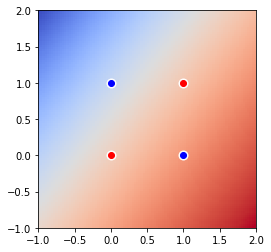

epoch 100, error = 0.128


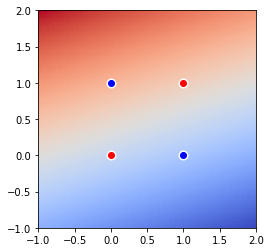

epoch 200, error = 0.126


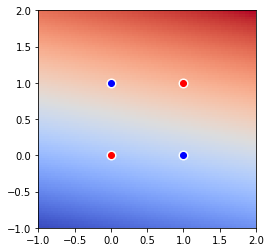

In [6]:
slp = MLP(layers=[2, 1])

cum_epochs = 0

for epochs in [1, 99, 100]:
    
    error = slp.fit(x, y, epochs, eta=3)
    cum_epochs += epochs
    
    print('epoch %i, error = %.3f' % (cum_epochs, error))
    plot_predictions(x, y, slp, zoom_out_ratio=2)
    plt.show()

## Multilayer perceptron, 1 hidden layer

epoch 1, error = 0.135


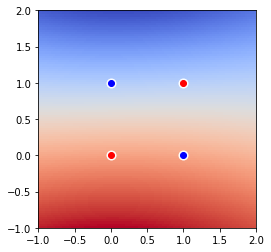

epoch 50, error = 0.067


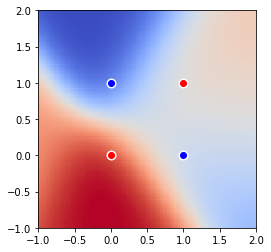

epoch 100, error = 0.009


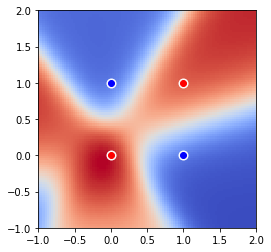

In [7]:
slp = MLP(layers=[2, 10, 1])

cum_epochs = 0

for epochs in [1, 49, 50]:
    
    error = slp.fit(x, y, epochs, eta=3)
    cum_epochs += epochs
    
    print('epoch %i, error = %.3f' % (cum_epochs, error))
    plot_predictions(x, y, slp, zoom_out_ratio=2)
    plt.show()

## Multilayer perceptron, 2 hidden layers

epoch 1, error = 0.149


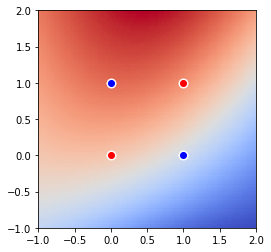

epoch 600, error = 0.057


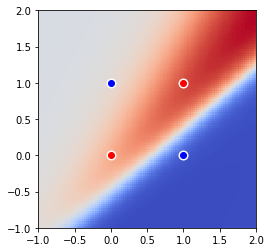

epoch 1000, error = 0.000


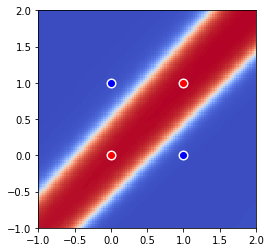

In [8]:
slp = MLP(layers=[2, 5, 5, 1])

cum_epochs = 0

for epochs in [1, 599, 400]:
    
    error = slp.fit(x, y, epochs, eta=3)
    cum_epochs += epochs
    
    print('epoch %i, error = %.3f' % (cum_epochs, error))
    plot_predictions(x, y, slp, zoom_out_ratio=2)
    plt.show()